In [1]:
#载入环境
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
#读取文件
train = pd.read_csv('D:/MNIST/train.csv')
validate = pd.read_csv('D:/MNIST/Dig-MNIST.csv')

In [3]:
#检查形状
print(train.shape)
print(validate.shape)
print(type(train))

(60000, 785)
(10240, 785)
<class 'pandas.core.frame.DataFrame'>


In [4]:
#可视化检查数据分布
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\59\.conda\envs\AI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='label'>

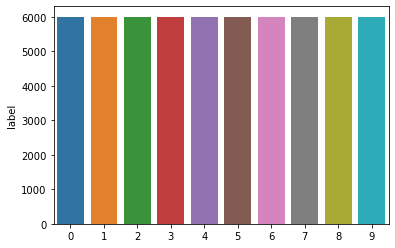

In [5]:
#观察是否均匀
y = train.label.value_counts()
sns.barplot(y.index, y)

In [6]:
#分离训练数据和标签
train_images = train.drop('label', axis = 1)
train_labels = train.label
val_images = validate.drop('label', axis = 1)
val_labels = validate.label

In [7]:
#归一化处理
train_images = train_images / 255 #0~255     0~1
val_images = val_images / 255

In [8]:
#reshape图像数据，使TensorFlow可以识别
train_images=train_images.values.reshape(-1, 28, 28, 1) #60000*28*28*1
val_images=val_images.values.reshape(-1, 28, 28, 1)

In [9]:
train_images.shape

(60000, 28, 28, 1)

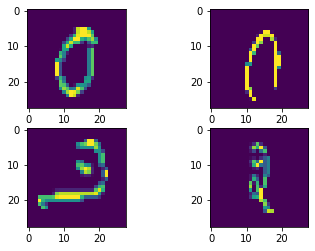

In [10]:
#打印reshape的结果
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_images[i][:, :, 0])
plt.show()

In [11]:
#标签编码
train_labels = to_categorical(train_labels) #猫[1, 0]     狗[0, 1]
val_labels = to_categorical(val_labels)

In [12]:
#从训练数据中分离训练集和测试集
train_images,test_images,train_labels,test_labels = train_test_split(train_images, train_labels, 
                                                                     random_state = 0, test_size = 0.2) #y = 3x+2 20% 80%

In [14]:
#建立模型
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu', input_shape = (28, 28, 1)))   #sigmod
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [15]:
#%%检查模型
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)         

In [16]:
#%%设置优化器
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = optimizer,loss = ['categorical_crossentropy'],metrics = ['accuracy'])

In [17]:
#%%设置训练参数
epochs =  3
batch_size = 64

In [18]:
#%%训练模型并记录训练结果
history = model.fit(train_images, train_labels,
                   batch_size = batch_size, epochs = epochs)

Epoch 1/3
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3231 - accuracy: 0.8932
Epoch 2/3
48000/48000 [==============================] - 43s 896us/step - loss: 0.0794 - accuracy: 0.9765
Epoch 3/3
48000/48000 [==============================] - 41s 844us/step - loss: 0.0596 - accuracy: 0.9818


Text(0, 0.5, 'accuracy')

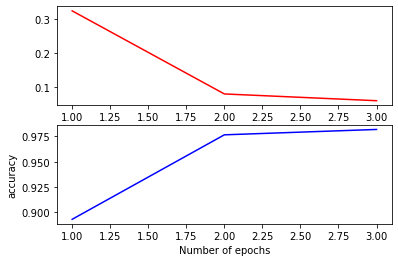

In [19]:
#%%准确率可视化
fig,ax = plt.subplots(2, 1)
fig.set
x = range(1,1 + epochs)
ax[0].plot(x,history.history['loss'],color = 'red')

ax[1].plot(x,history.history['accuracy'],color = 'blue')

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

In [20]:
prediction = model.predict(val_images)
prediction = np.argmax(prediction, axis = 1) #按行返回最高概率所在下标，在本题中即为对应数字
true_label = np.argmax(val_labels, axis = 1) #将one-hot化的验证集标签复原

In [21]:
cm = confusion_matrix(true_label, prediction)
cm = pd.DataFrame(cm,index=range(0,10),columns=range(0,10))
print(cm)

     0    1    2    3    4    5    6    7    8    9
0  590   29   61   34    0   13   11    4   27  255
1  152  742   56    9   11   15    0   20    5   14
2    7    0  960   10    5   26    4    1    9    2
3    9    3  108  575    5  188   25  103    4    4
4    1   11   25    1  814   49    3    4   82   34
5    1    4    4    1    5  985    0    1   22    1
6    2    2   20    5   43   19  760   60   12  101
7    3    5   28    2    0    6  264  696    6   14
8    4    2   52    0    0   11   42    1  821   91
9    0    6    1    0    1    1   59   10   14  932


In [22]:
pre_result = (prediction - true_label == 0).tolist()

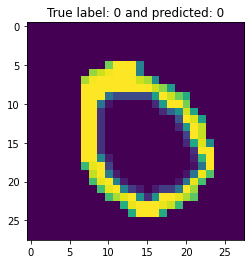

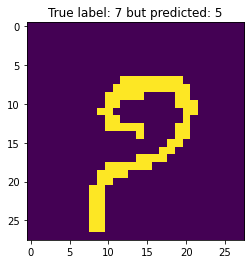

In [23]:
for i in range(len(pre_result)):
    if pre_result[i] == True:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' and predicted: ' + str(prediction[i]))
        break

for i in range(len(pre_result)):
    if pre_result[i] == False:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' but predicted: ' + str(prediction[i]))
        break